# Recommendation system based on reviews

## Context:
You, as a Data Scientist, have been asked to build a recommendation service for users on a vacation rental platform based on their previous experience.
## Task:
Your task would be to develop a recommendation model that could recommend returning users new properties based on their old reviews. Let’s just assume that our platform has only vacation houses in London and we would like to recommend new properties only to our loyal returning users.
## Data:
As an input you get the London Airbnb Dataset where you can find user reviews and general information about listings.

## Deliverables / outcome:
Upon completion of your analysis, your presentation should encompass the following:

• insights and challenges that you’ve faced during the discovery process,

• results of the sentiment analysis, how you extracted signals for the recommendation model

• recommendation model itself: what approach and algorithm was selected, why and how it can be evaluated.


In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Read data

In [2]:
df_cal= pd.read_csv('recommendations/calendar.csv')
df_cal.sample(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
6197445,12305010,2020-10-03,f,$280.00,$280.00,3.0,1125.0
13908626,21844951,2020-10-25,f,$90.00,$90.00,3.0,1125.0
8807084,16145289,2020-09-28,f,$28.00,$28.00,1.0,1125.0


In [3]:
df_reviews= pd.read_csv('recommendations/reviews.csv')
df_reviews.sample(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
508059,9461266,114810187,2016-11-20,53343897,Steffi,Elenita home is vey lovely with a private bedr...
1275436,27568238,481616728,2019-07-05,120991170,Vinay,Nice room in a friendly house. Very welcoming ...
1141919,23288079,456716505,2019-05-22,256027972,Karen,We stayed in the dream room which has its own ...


In [35]:
df_reviews[df_reviews['reviewer_id']==1621287]['comments'].values

array(['The location is a 5-minute walk to the borough station, which is very convenient.\nThere are also 3 bedrooms, which are very good value for money.\nThe response from the landlord was also quick and very helpful'],
      dtype=object)

In [36]:
df_reviews[df_reviews['listing_id']==31325432]['comments'].values

array(['I had a great stay!',
       'Great location near Wembley and frequent trains to the city'],
      dtype=object)

In [37]:
df_reviews[df_reviews['listing_id']==20098244]['comments'].values

array(['Great host \nGood communication and great place to stay',
       'Great stay, very close to Gunnersbury. Large, comfortable beds and very clean. Ricardo was a great host.'],
      dtype=object)

In [38]:
df_reviews[df_reviews['listing_id']==35024701]['comments'].values

array(['You can expect kindness, and a cute ambient',
       'Great place 15 minutes walk from tube. Quiet at night and Samantha is great crack',
       'Sam is very hospitable.',
       'Samantha was a very gracious host who went out of her way to be helpful. I highly recommend her accommodation!'],
      dtype=object)

In [4]:
df_reviews_summary= pd.read_csv('recommendations/reviews_summary.csv')
df_reviews_summary.sample(3)

,listing_id,date
842126,17325472,2017-04-21
245852,3294255,2017-10-08
88252,604185,2014-05-15


In [5]:
del df_reviews_summary #not usefull

In [6]:
df_listings= pd.read_csv('recommendations/listings.csv')
df_listings.sample(3)

/var/folders/m3/g488472j5m107y4lcmq9gs940000gr/T/ipykernel_53674/1334777753.py:1: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings= pd.read_csv('recommendations/listings.csv')


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
65025,33993034,https://www.airbnb.com/rooms/33993034,20191105115249,2019-11-06,"2 mins. to RAILWAY STATION, close to RUGBY sta...",NaN,NaN,NaN,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
14609,10469392,https://www.airbnb.com/rooms/10469392,20191105115249,2019-11-05,Lovely 3 bed House Perfect Location,Completely modernised house with all appliance...,Modern stylish refurb finished to a high stand...,Completely modernised house with all appliance...,none,"Located on the beautiful quiet, green and lea...",...,f,f,strict_14_with_grace_period,f,f,3,1,2,0,1.39
1188,590443,https://www.airbnb.com/rooms/590443,20191105115249,2019-11-06,ILFORD - 2 DR (1 private bathr + 1 en-suite ba...,Modern entire flat. Parking space (undergound)...,Luxury 2 double bedrooms. Private bathroom plu...,Modern entire flat. Parking space (undergound)...,none,- All you need is within 5-10 minutes walk (su...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.11


In [7]:
df_listings_summary= pd.read_csv('recommendations/listings_summary.csv')
df_listings_summary.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2816,1797398,Spacious flat in East London,6623606,Sam,NaN,Tower Hamlets,51.53278,-0.04720,Entire home/apt,69,7,9,2015-10-18,0.12,1,0
45354,24927982,Stunning luxury one bedroom appartment,4214976,Lynne,NaN,Haringey,51.57967,-0.13099,Entire home/apt,90,5,25,2019-09-08,1.43,2,0
50368,27390113,Great North London Location,11194649,Richard,NaN,Camden,51.53678,-0.14406,Entire home/apt,100,25,10,2019-01-04,0.69,1,0


In [8]:
df_neighbourhoods= pd.read_csv('recommendations/neighbourhoods.csv')
df_neighbourhoods.sample(3)

,neighbourhood_group,neighbourhood
8,NaN,Ealing
16,NaN,Hillingdon
21,NaN,Lambeth


In [9]:
df_neighbourhoods_geo = geopandas.read_file("recommendations/neighbourhoods.geojson")
df_neighbourhoods_geo.sample(3)

,neighbourhood,neighbourhood_group,geometry
17,Greenwich,NaN,"MULTIPOLYGON (((-0.02485 51.48555, -0.02479 51..."
28,Islington,NaN,"MULTIPOLYGON (((-0.13839 51.55686, -0.13851 51..."
23,Kensington and Chelsea,NaN,"MULTIPOLYGON (((-0.18388 51.47742, -0.18403 51..."


In [10]:
del df_neighbourhoods_geo, df_neighbourhoods #not usefull

# Review analysis

In [11]:
df_reviews['comments'].fillna('NA',inplace=True)

In [12]:
df_reviews['isEnglish'] = df_reviews['comments'].apply(lambda x: x.isascii())

## Filter non-english review

In [13]:
print("Number of review in non-eglish language is:",len(df_reviews[~df_reviews['isEnglish']]),"(",round(100.*len(df_reviews[~df_reviews['isEnglish']])/len(df_reviews),2),"%)")

Number of review in non-eglish language is: 317386 ( 21.36 %)


In [14]:
df_reviews = df_reviews[df_reviews['isEnglish']]

## Reviews statistic

In [15]:
print("Fraction of listings with review:",round(100.*df_reviews['listing_id'].nunique()/df_listings['id'].nunique(),2),"%")

Fraction of listings with review: 74.33 %


In [16]:
print("Number of neighbourhoods",df_listings_summary['neighbourhood'].nunique())

Number of neighbourhoods 33


In [17]:
df_reviews['reviews_per_user'] = df_reviews.groupby(['reviewer_id'])['id'].transform('nunique')
print("User",df_reviews[df_reviews['reviews_per_user']==df_reviews['reviews_per_user'].max()]['reviewer_id'].unique(),
      " wrote max(",df_reviews['reviews_per_user'].max(),") reviews")

User [67753141]  wrote max( 90 ) reviews


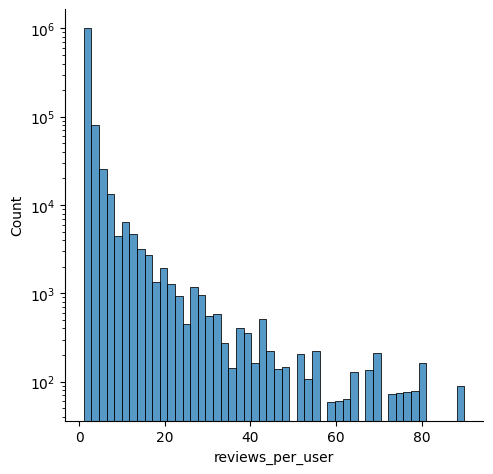

In [18]:
sns.displot(df_reviews, x="reviews_per_user", bins=50)
plt.yscale('log')

#### Observation: most of user write just few reviews, however some users write many reviews (up to 90!)

In [19]:
df_reviews['listings_per_user'] = df_reviews.groupby(['reviewer_id'])['listing_id'].transform('nunique')
print("On average user visited",round(df_reviews['listings_per_user'].mean(),2)," locations")

On average user visited 1.72  locations


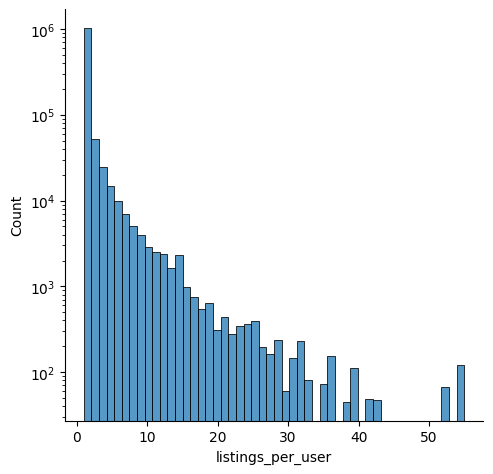

In [20]:
sns.displot(df_reviews, x="listings_per_user", bins=50)
plt.yscale('log')

In [21]:
df_reviews['reviews_per_listing'] = df_reviews.groupby(['listing_id'])['id'].transform('nunique')
df_reviews['users_per_listing'] = df_reviews.groupby(['listing_id'])['reviewer_id'].transform('nunique')

In [22]:
print("On average a listing reviewed by",round(df_reviews['users_per_listing'].mean(),2)," users")

On average a listing reviewed by 73.0  users


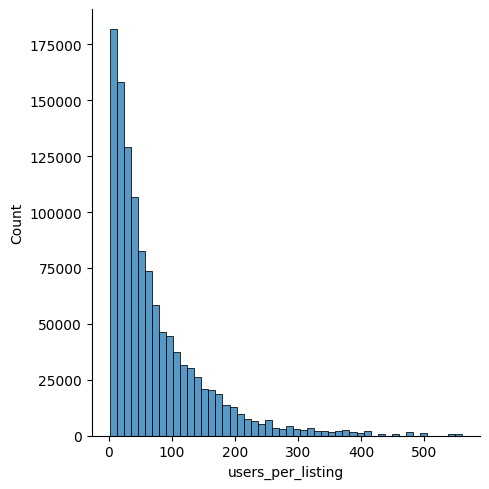

In [23]:
sns.displot(df_reviews, x="users_per_listing", bins=50)
#plt.yscale('log')

#### Observation: majority of listings have reviews from less than 100 users, but some are very popular and has ~600 reviewers

## Concatinate all reviews for a listing-user pair

In [24]:
df_reviews['comments'].fillna('missing',inplace=True)

In [25]:
df_reviews_listing = df_reviews.groupby(['listing_id','reviewer_id'])['comments'].apply(','.join).reset_index()
df_reviews_listing.sample(3).T

,951798,222709,292400
listing_id,26243758,4090206,5995648
reviewer_id,8917174,20841787,53454708
comments,"Marina's place was sparkling clean, superb loc...",My boyfriend and I had a lovely stay here. Ber...,Extremely comfortable and relaxing stay In a g...


## Enchance reviews with listings descriptions

In [26]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [27]:
df_listings.sample(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
8679,6794650,https://www.airbnb.com/rooms/6794650,20191105115249,2019-11-06,New two beds in central London,A lovely nearly new two bedrooms home in centr...,NaN,A lovely nearly new two bedrooms home in centr...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,NaN
2608,1430558,https://www.airbnb.com/rooms/1430558,20191105115249,2019-11-06,Lovely Spacious Quiet Flat-CENTRAL- near Kings X,Lovely bright newly built flat in quiet but ce...,This is a lovely bright spacious newly built f...,Lovely bright newly built flat in quiet but ce...,none,I love how quiet it is- but how close and walk...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.91
11734,8495545,https://www.airbnb.com/rooms/8495545,20191105115249,2019-11-05,Beautiful one bed flat in Belsize Park.,Beautiful one bed room flat with outdoor patio...,I wont be around but someone will be available...,Beautiful one bed room flat with outdoor patio...,none,Hampstead Heath is the largest outside space w...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.45


In [28]:
df_listings['neighborhood_overview'].fillna('NA',inplace=True)
df_listings['description'].fillna('NA',inplace=True)
df_listings['name'].fillna('NA',inplace=True)
df_reviews_listing = df_reviews_listing.merge(df_listings[['id','name','description','neighborhood_overview']],left_on='listing_id',right_on='id',how='left')
df_reviews_listing['comments'] = df_reviews_listing['name']+""+df_reviews_listing['description']+""+df_reviews_listing['neighborhood_overview']+""+df_reviews_listing['comments']
df_reviews_listing.sample(5) 

,listing_id,reviewer_id,comments,id,name,description,neighborhood_overview
581402,15211492,173367022,Wow.. I'd love to stay there!My place is very ...,15211492,Wow.. I'd love to stay there!,My place is very close to Queens park tube sta...,"Great neighbourhood, very clean and safe."
144422,1848733,5377182,3 BDR beautiful and stylish Islington flatEnjo...,1848733,3 BDR beautiful and stylish Islington flat,Enjoy this stunning architecturally designed 3...,Canonbury itself is gorgeous - Keira Knightley...
1004850,28684370,10978483,Modern 2BD Apartment Right By The Thames!Based...,28684370,Modern 2BD Apartment Right By The Thames!,Based in a stunning new Thames-side developmen...,Battersea is heralded as one of London’s most ...
151011,2024046,62187488,Royal Court of Justice viewAlthough the design...,2024046,Royal Court of Justice view,Although the design of the building appears to...,"In the neighbourhood: St Paul's Cathedral, Cov..."
34725,388032,47114480,Single roomI have a beautiful single bed in a ...,388032,Single room,I have a beautiful single bed in a double room...,NA


In [29]:
df_listings['id'].nunique()

85068

In [30]:
df_reviews_listing['listing_id'].nunique()

63229

In [31]:
df_reviews_listing['reviewer_id'].nunique()

967763

# Save the file for modeling

In [32]:
df_reviews_listing.to_csv('review_listings_merged.csv',index=False)

In [33]:
print("done!")

done!
